In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [6]:
df = pd.read_csv('AIML Dataset.csv')

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.shape

(436601, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436601 entries, 0 to 436600
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            436601 non-null  int64  
 1   type            436601 non-null  object 
 2   amount          436601 non-null  float64
 3   nameOrig        436601 non-null  object 
 4   oldbalanceOrg   436601 non-null  float64
 5   newbalanceOrig  436601 non-null  float64
 6   nameDest        436600 non-null  object 
 7   oldbalanceDest  436600 non-null  float64
 8   newbalanceDest  436600 non-null  float64
 9   isFraud         436600 non-null  float64
 10  isFlaggedFraud  436600 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 36.6+ MB


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,436382
1.0,218


In [12]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,436600


In [13]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [14]:
percent_of_fraud_to_total_data = round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)
print(f"{percent_of_fraud_to_total_data}% of data is fraud")

0.05% of data is fraud


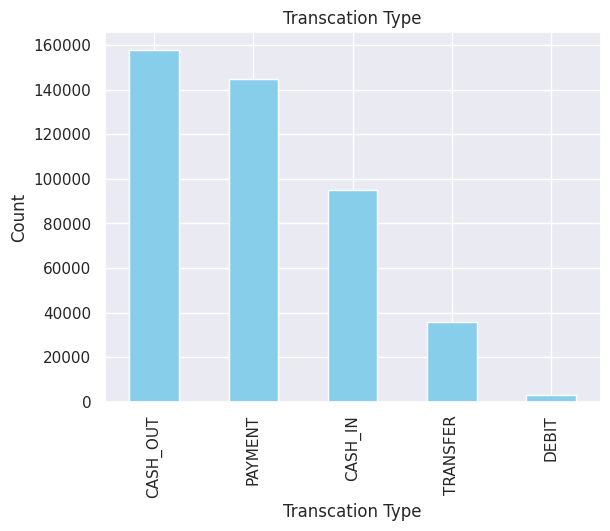

In [15]:
df['type'].value_counts().plot(kind="bar", title="Transcation Type", color="skyblue")
plt.xlabel("Transcation Type")
plt.ylabel("Count")
plt.show()

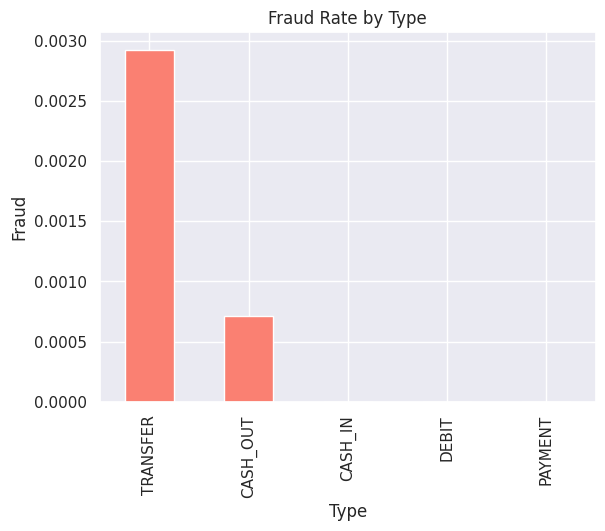

In [16]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.xlabel("Type")
plt.ylabel("Fraud")
plt.show()

In [17]:
df["amount"].describe().astype(int)

,amount
count,436601
mean,170559
std,280524
min,0
25%,13508
50%,81950
75%,227637
max,10000000


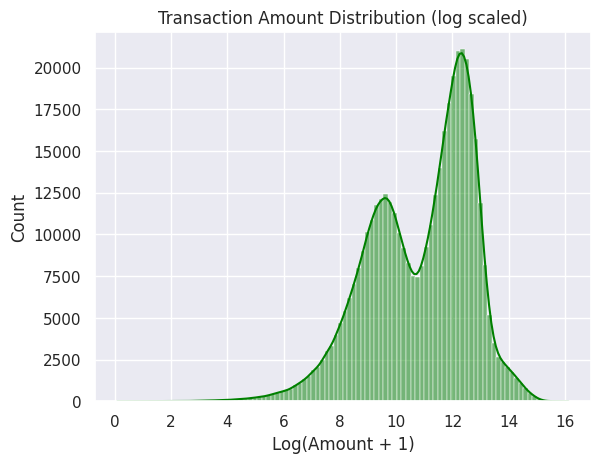

In [18]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scaled)")
plt.xlabel("Log(Amount + 1)")
plt.show()

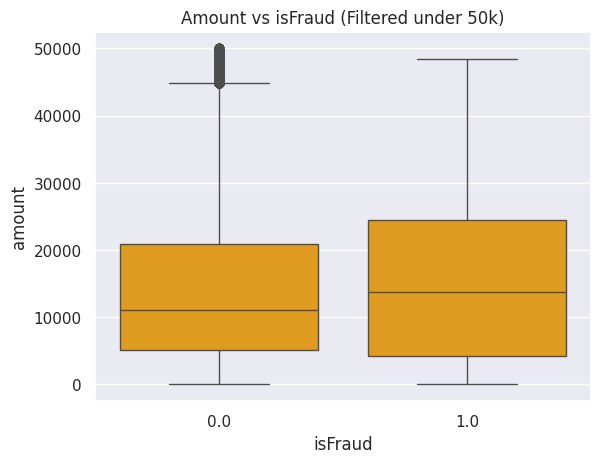

In [19]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount", color="orange")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [20]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [21]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(94769)

In [22]:
(df["balanceDiffDest"] < 0).sum()

np.int64(85736)

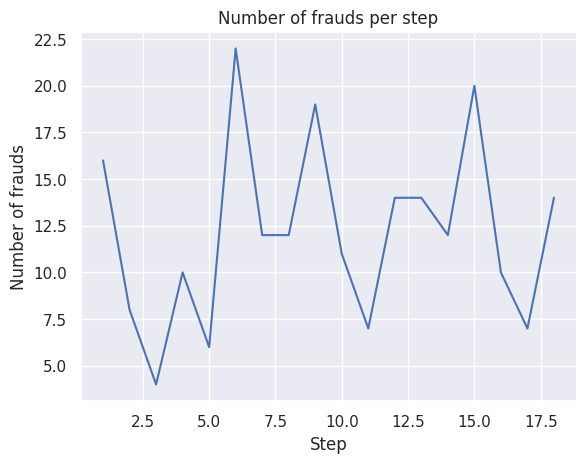

In [23]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step")
plt.ylabel("Number of frauds")
plt.title("Number of frauds per step")
plt.grid(True)
plt.show()

In [24]:
df.drop(columns="step", inplace=True)

In [25]:
df.head(3)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0


In [26]:
top_senders = df["nameOrig"].value_counts().head(15)

In [27]:
print(top_senders)

nameOrig
C1709295811    2
C260230637     2
C813633808     2
C111557025     2
C2012831257    2
C1250194175    2
C1710302637    2
C457997071     2
C1154669435    2
C1162717140    2
C884511024     2
C1884851412    2
C1842781381    2
C1386878398    2
C119887223     2
Name: count, dtype: int64


In [28]:
top_recievers = df["nameDest"].value_counts().head(15)

In [29]:
print(top_recievers)

nameDest
C985934102     89
C1286084959    87
C248609774     86
C665576141     83
C2083562754    82
C977993101     78
C1590550415    78
C1360767589    77
C451111351     74
C97730845      72
C306206744     70
C716083600     68
C1899073220    68
C1234776885    68
C667346055     66
Name: count, dtype: int64


In [30]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [31]:
print(fraud_users)

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64


In [32]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [33]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,157928
TRANSFER,35896


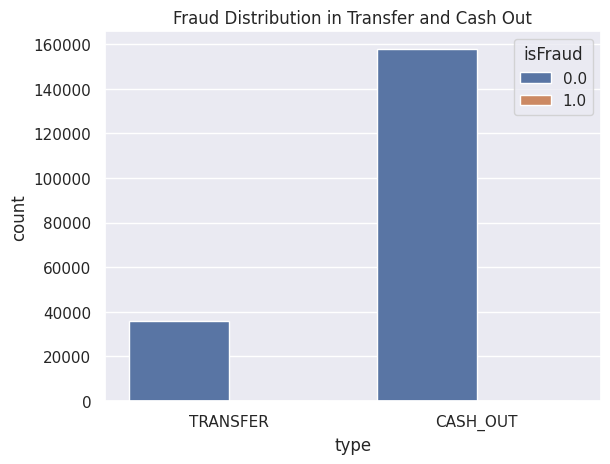

In [34]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()

In [35]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

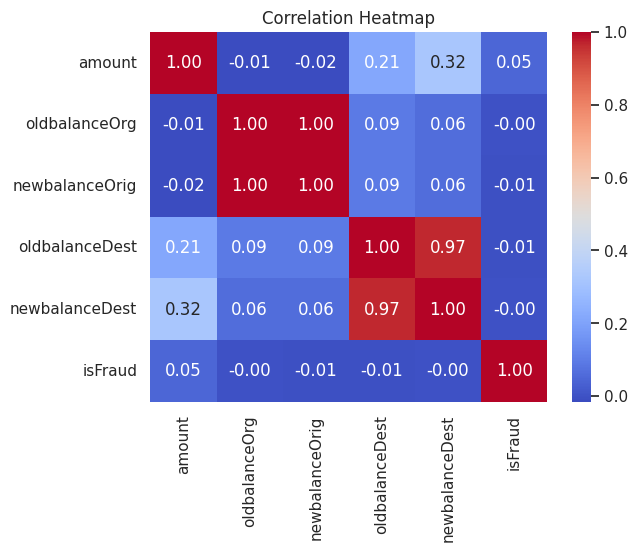

In [36]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
zero_after_transer = df[
      (df["oldbalanceOrg"] > 0) &
      (df["newbalanceOrig"] == 0) &
      (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [38]:
len(zero_after_transer)

80242

In [39]:
zero_after_transer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,2712905.89


In [40]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,436382
1.0,218


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [43]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [45]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [46]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [47]:
df_model.dropna(subset=['isFraud'], inplace=True)

y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [49]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [51]:
y_pred = pipeline.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92    130915
         1.0       0.00      0.91      0.01        65

    accuracy                           0.86    130980
   macro avg       0.50      0.88      0.47    130980
weighted avg       1.00      0.86      0.92    130980



In [53]:
confusion_matrix(y_test, y_pred)

array([[112571,  18344],
       [     6,     59]])

In [54]:
pipeline.score(X_test, y_test) * 100

85.99022751565124

In [55]:
threshold = 0.7

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(f"Classification Report with Adjusted Threshold ({threshold}):")
print(classification_report(y_test, y_pred_adjusted))

print(f"\nConfusion Matrix with Adjusted Threshold ({threshold}):")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold (0.7):
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    130915
         1.0       0.01      0.71      0.02        65

    accuracy                           0.97    130980
   macro avg       0.51      0.84      0.50    130980
weighted avg       1.00      0.97      0.98    130980


Confusion Matrix with Adjusted Threshold (0.7):
[[126663   4252]
 [    19     46]]


In [56]:
print(f"Classification Report with Adjusted Threshold (0.7):")
print(classification_report(y_test, y_pred_adjusted))

print(f"\nConfusion Matrix with Adjusted Threshold (0.7):")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nAnalysis of Confusion Matrix Changes:")
initial_confusion_matrix = np.array([[1549392,   80014],
                                    [     46,    1216]]) # Confusion matrix from default threshold (0.5)
adjusted_confusion_matrix = confusion_matrix(y_test, y_pred_adjusted)

print(f"\nInitial Confusion Matrix (Threshold 0.5):\n{initial_confusion_matrix}")
print(f"\nAdjusted Confusion Matrix (Threshold 0.7):\n{adjusted_confusion_matrix}")

false_positives_initial = initial_confusion_matrix[0, 1]
false_positives_adjusted = adjusted_confusion_matrix[0, 1]
false_negatives_initial = initial_confusion_matrix[1, 0]
false_negatives_adjusted = adjusted_confusion_matrix[1, 0]
true_positives_initial = initial_confusion_matrix[1, 1]
true_positives_adjusted = adjusted_confusion_matrix[1, 1]
true_negatives_initial = initial_confusion_matrix[0, 0]
true_negatives_adjusted = adjusted_confusion_matrix[0, 0]

Classification Report with Adjusted Threshold (0.7):
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    130915
         1.0       0.01      0.71      0.02        65

    accuracy                           0.97    130980
   macro avg       0.51      0.84      0.50    130980
weighted avg       1.00      0.97      0.98    130980


Confusion Matrix with Adjusted Threshold (0.7):
[[126663   4252]
 [    19     46]]

Analysis of Confusion Matrix Changes:

Initial Confusion Matrix (Threshold 0.5):
[[1549392   80014]
 [     46    1216]]

Adjusted Confusion Matrix (Threshold 0.7):
[[126663   4252]
 [    19     46]]


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Apply the preprocessor to the training data first
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the processed training data
smote = SMOTE(random_state=42) # Added random_state for reproducibility
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Instantiate and train a new Logistic Regression model on the balanced data
# Note: The preprocessor is already applied, so the pipeline should only contain the classifier
pipeline_smote = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42) # Added random_state for reproducibility

pipeline_smote.fit(X_train_smote, y_train_smote)

# Apply the preprocessor to the test data before making predictions
X_test_processed = preprocessor.transform(X_test)

# Make predictions on the original test set (processed)
y_pred_smote = pipeline_smote.predict(X_test_processed)

# Evaluate the model
print("Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix with SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

Classification Report with SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94    130915
         1.0       0.00      0.91      0.01        65

    accuracy                           0.88    130980
   macro avg       0.50      0.89      0.47    130980
weighted avg       1.00      0.88      0.94    130980


Confusion Matrix with SMOTE:
[[115364  15551]
 [     6     59]]


In [58]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
neg_count = y_train.value_counts()[0.0]
pos_count = y_train.value_counts()[1.0]
scale_pos_weight_value = neg_count / pos_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

# Define and instantiate the XGBClassifier with scale_pos_weight
xgb_classifier = XGBClassifier(objective='binary:logistic',
                               eval_metric='logloss', # Using logloss as an evaluation metric
                               use_label_encoder=False, # Suppress the warning
                               scale_pos_weight=scale_pos_weight_value,
                               random_state=42)

# Create a pipeline with the preprocessor and XGBoost classifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

# Fit the pipeline to the original training data
print("\nTraining XGBoost model...")
pipeline_xgb.fit(X_train, y_train)
print("Training complete.")

# Use the trained pipeline to make predictions on the original test data
y_pred_xgb = pipeline_xgb.predict(X_test)

# Print the classification report and confusion matrix
print("\nClassification Report with XGBoost (scale_pos_weight):")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix with XGBoost (scale_pos_weight):")
print(confusion_matrix(y_test, y_pred_xgb))

Calculated scale_pos_weight: 1996.52

Training XGBoost model...
Training complete.

Classification Report with XGBoost (scale_pos_weight):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130915
         1.0       0.49      0.62      0.55        65

    accuracy                           1.00    130980
   macro avg       0.75      0.81      0.77    130980
weighted avg       1.00      1.00      1.00    130980


Confusion Matrix with XGBoost (scale_pos_weight):
[[130874     41]
 [    25     40]]


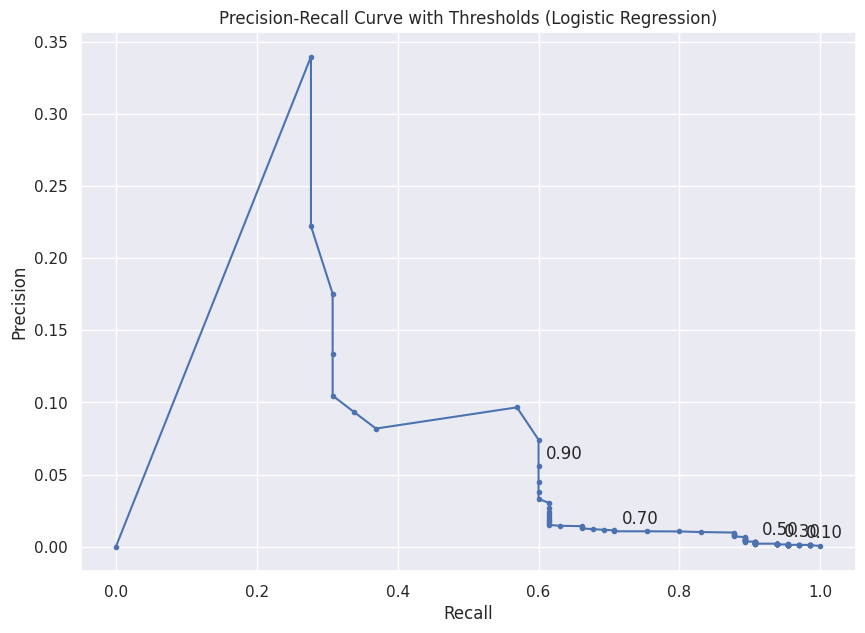


Evaluation at Threshold closest to 0.7 (0.70):
Precision: 0.0107
Recall: 0.7077

Selected Threshold to achieve Precision >= 0.1: 0.95
Corresponding Precision: 0.1047
Corresponding Recall: 0.3077

Recommended Threshold for improved precision (manual selection): 0.90
Corresponding Precision: 0.0559
Corresponding Recall: 0.6000


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for the positive class (fraud)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# 2. Define an array of potential classification thresholds
# Use np.arange for better control over steps
thresholds = np.arange(0.0, 1.01, 0.01) # From 0.00 to 1.00 with 0.01 step

# 3. & 4. Iterate through thresholds and calculate precision and recall
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_thresholded = (y_pred_proba >= threshold).astype(int)

    # Handle the case where no positive predictions are made (especially at high thresholds)
    if np.sum(y_pred_thresholded) == 0 and np.sum(y_test) > 0:
        # If there are actual positives but none are predicted, precision is 0, recall is 0
        precision = 0.0
        recall = 0.0
    elif np.sum(y_pred_thresholded) > 0 and np.sum(y_test) == 0:
         # If there are no actual positives but some are predicted, precision is 0
         precision = 0.0
         recall = 0.0 # Recall is not well-defined, but set to 0 as no positives are caught
    elif np.sum(y_pred_thresholded) == 0 and np.sum(y_test) == 0:
        # If there are no actual positives and none are predicted, precision and recall are 1 (perfect prediction of negatives)
        precision = 1.0
        recall = 1.0
    else:
        report = classification_report(y_test, y_pred_thresholded, output_dict=True, zero_division=0)
        # Check if '1.0' key exists in the report before accessing
        if '1.0' in report:
            precision = report['1.0']['precision']
            recall = report['1.0']['recall']
        else:
             # If no actual or predicted positives, report won't have '1.0'. Handle based on total positives/predicted positives
             # This case should be covered by the checks above, but as a fallback
             precision = 0.0
             recall = 0.0

    precision_scores.append(precision)
    recall_scores.append(recall)

# 5. Precision-recall curve for visualization (using calculated points)

# 6. Plot the precision-recall curve with thresholds
plt.figure(figsize=(10, 7))
plt.plot(recall_scores, precision_scores, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Thresholds (Logistic Regression)")
plt.grid(True)

# Annotate some key thresholds on the plot for better understanding
# Let's annotate thresholds that correspond to specific points on the curve
# Find indices for some representative thresholds
representative_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
annotated_indices = [np.abs(thresholds - t).argmin() for t in representative_thresholds]

for i in annotated_indices:
    threshold = thresholds[i]
    plt.annotate(f'{threshold:.2f}',
                 (recall_scores[i], precision_scores[i]),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='left')

plt.show()

# 7. & 8. Identify a threshold that improves precision and print results
# Find the index for the threshold closest to 0.7
closest_threshold_index_07 = np.abs(thresholds - 0.7).argmin()
selected_threshold_07 = thresholds[closest_threshold_index_07]

print(f"\nEvaluation at Threshold closest to 0.7 ({selected_threshold_07:.2f}):")
print(f"Precision: {precision_scores[closest_threshold_index_07]:.4f}")
print(f"Recall: {recall_scores[closest_threshold_index_07]:.4f}")

# Let's also identify a threshold that significantly improves precision from the default 0.01/0.03
# while retaining some reasonable recall.
# We need to look at the precision_scores and recall_scores lists to make a decision.
# For example, let's look for the threshold where precision first exceeds 0.1 (if any).
target_precision = 0.1
best_threshold_for_precision = None
corresponding_recall = None
corresponding_precision = None

for t, p, r in zip(thresholds, precision_scores, recall_scores):
    if p >= target_precision:
        best_threshold_for_precision = t
        corresponding_recall = r
        corresponding_precision = p
        break # Stop at the first threshold that meets the target precision

if best_threshold_for_precision is not None:
    print(f"\nSelected Threshold to achieve Precision >= {target_precision}: {best_threshold_for_precision:.2f}")
    print(f"Corresponding Precision: {corresponding_precision:.4f}")
    print(f"Corresponding Recall: {corresponding_recall:.4f}")
else:
    print(f"\nCould not find a threshold in the tested range that achieves Precision >= {target_precision}.")

# Based on the plot and values, recommend a threshold.
# A threshold around 0.9 might offer a better balance for precision,
# even if recall drops further.
selected_threshold_recommendation = 0.9 # Example recommendation based on typical PR curves
closest_threshold_index_recommendation = np.abs(thresholds - selected_threshold_recommendation).argmin()
recommended_threshold = thresholds[closest_threshold_index_recommendation]

print(f"\nRecommended Threshold for improved precision (manual selection): {recommended_threshold:.2f}")
print(f"Corresponding Precision: {precision_scores[closest_threshold_index_recommendation]:.4f}")
print(f"Corresponding Recall: {recall_scores[closest_threshold_index_recommendation]:.4f}")

In [60]:
from sklearn.ensemble import IsolationForest

# 2. Instantiate an IsolationForest model
# Setting contamination='auto' lets the model decide, but we know the fraud percentage is low (~0.08% in the full dataset).
# A fixed value like the estimated proportion of fraud in the training data could also be used.
# Let's use 'auto' for now and see the results.
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# 3. Fit the IsolationForest model to the processed training data
# Note: Isolation Forest is unsupervised, so we only fit on X_train_processed
print("Training Isolation Forest model...")
isolation_forest.fit(X_train_processed)
print("Training complete.")

# 4. Predict anomaly scores for the processed test data
# Lower scores indicate a higher likelihood of being an anomaly
anomaly_scores = isolation_forest.decision_function(X_test_processed)

# 5. Predict whether each data point is an outlier (-1) or inlier (1)
y_pred_isoforest = isolation_forest.predict(X_test_processed)

# 6. Evaluate the performance
# We want to see how many actual frauds (y_test == 1.0) are predicted as anomalies (y_pred_isoforest == -1)
# True Positives (Fraud correctly identified as Anomaly): actual fraud (1.0) and predicted anomaly (-1)
true_positives_isoforest = np.sum((y_test == 1.0) & (y_pred_isoforest == -1))

# False Positives (Non-Fraud incorrectly identified as Anomaly): actual non-fraud (0.0) and predicted anomaly (-1)
false_positives_isoforest = np.sum((y_test == 0.0) & (y_pred_isoforest == -1))

# False Negatives (Fraud incorrectly identified as Inlier): actual fraud (1.0) and predicted inlier (1)
false_negatives_isoforest = np.sum((y_test == 1.0) & (y_pred_isoforest == 1))

# True Negatives (Non-Fraud correctly identified as Inlier): actual non-fraud (0.0) and predicted inlier (1)
true_negatives_isoforest = np.sum((y_test == 0.0) & (y_pred_isoforest == 1))

# Total actual frauds
total_actual_frauds = np.sum(y_test == 1.0)

# Total predicted anomalies
total_predicted_anomalies = np.sum(y_pred_isoforest == -1)

# Percentage of actual frauds detected as anomalies (Recall for the fraud class in this context)
percentage_frauds_detected_isoforest = (true_positives_isoforest / total_actual_frauds) * 100 if total_actual_frauds > 0 else 0

# Precision in this context (Proportion of predicted anomalies that are actual frauds)
precision_isoforest = (true_positives_isoforest / total_predicted_anomalies) * 100 if total_predicted_anomalies > 0 else 0


# 7. Print the results
print("\nIsolation Forest Evaluation Results:")
print(f"Total observations in test set: {len(y_test)}")
print(f"Total actual frauds in test set: {total_actual_frauds}")
print(f"Total predicted anomalies: {total_predicted_anomalies}")

print("\nBreakdown of Predictions vs Actual:")
print(f"True Positives (Actual Fraud identified as Anomaly): {true_positives_isoforest}")
print(f"False Positives (Actual Non-Fraud identified as Anomaly): {false_positives_isoforest}")
print(f"False Negatives (Actual Fraud identified as Inlier): {false_negatives_isoforest}")
print(f"True Negatives (Actual Non-Fraud identified as Inlier): {true_negatives_isoforest}")

print(f"\nPercentage of Actual Frauds Detected as Anomalies (Recall): {percentage_frauds_detected_isoforest:.2f}%")
print(f"Percentage of Predicted Anomalies that are Actual Frauds (Precision): {precision_isoforest:.2f}%")

# Note: Precision and Recall here are calculated based on treating 'Anomaly' (-1) as the positive prediction
# and 'Fraud' (1.0) as the actual positive class for evaluation purposes against the ground truth.

Training Isolation Forest model...
Training complete.

Isolation Forest Evaluation Results:
Total observations in test set: 130980
Total actual frauds in test set: 65
Total predicted anomalies: 16446

Breakdown of Predictions vs Actual:
True Positives (Actual Fraud identified as Anomaly): 25
False Positives (Actual Non-Fraud identified as Anomaly): 16421
False Negatives (Actual Fraud identified as Inlier): 40
True Negatives (Actual Non-Fraud identified as Inlier): 114494

Percentage of Actual Frauds Detected as Anomalies (Recall): 38.46%
Percentage of Predicted Anomalies that are Actual Frauds (Precision): 0.15%


In [61]:
# 1. Create new features in the DataFrame df_model

# Ratio of amount to oldbalanceOrg (handle division by zero)
df_model['amount_to_oldbalanceOrg'] = np.where(df_model['oldbalanceOrg'] == 0, 0, df_model['amount'] / df_model['oldbalanceOrg'])

# Ratio of amount to newbalanceOrig (handle division by zero)
df_model['amount_to_newbalanceOrig'] = np.where(df_model['newbalanceOrig'] == 0, 0, df_model['amount'] / df_model['newbalanceOrig'])

# Indicator for transactions where newbalanceOrig is zero after the transaction for TRANSFER and CASH_OUT
df_model['newbalanceOrig_zero_transfer_cashout'] = ((df_model['newbalanceOrig'] == 0) &
                                                    df_model['type'].isin(['TRANSFER', 'CASH_OUT'])).astype(int)

# Indicator for transactions where newbalanceDest is zero after the transaction for TRANSFER and CASH_OUT
df_model['newbalanceDest_zero_transfer_cashout'] = ((df_model['newbalanceDest'] == 0) &
                                                    df_model['type'].isin(['TRANSFER', 'CASH_OUT'])).astype(int)

# Interaction term between 'type' and 'amount' (example: amount for TRANSFER type)
df_model['transfer_amount'] = np.where(df_model['type'] == 'TRANSFER', df_model['amount'], 0)
df_model['cashout_amount'] = np.where(df_model['type'] == 'CASH_OUT', df_model['amount'], 0)


# 2. Define the features to be used for modeling (X) and the target variable (y)
y = df_model["isFraud"]
# Drop the original balance columns if you are replacing them with ratios, or keep them. Let's keep them for now.
# Also drop the original balance difference features as the new ones might be more informative for ratios
X = df_model.drop(["isFraud", "balanceDiffOrig", "balanceDiffDest"], axis=1)

# Update numeric and categorical feature lists
categorical = ["type"]
# Add new numerical features
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest",
           'amount_to_oldbalanceOrg', 'amount_to_newbalanceOrig',
           'newbalanceOrig_zero_transfer_cashout', 'newbalanceDest_zero_transfer_cashout',
           'transfer_amount', 'cashout_amount']


# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 4. Update the ColumnTransformer
preprocessor_new_features = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical) # handle_unknown='ignore' for safety with new features
    ],
    remainder="passthrough" # Keep other columns (if any, although we dropped most)
)

# 5. Re-train the Logistic Regression model
pipeline_lr_new_features = Pipeline([
    ('preprocessor', preprocessor_new_features),
    ('classifier', LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

print("Training Logistic Regression model with new features...")
pipeline_lr_new_features.fit(X_train, y_train)
print("Training complete.")

# 6. Make predictions on the test set
y_pred_lr_new_features = pipeline_lr_new_features.predict(X_test)

# 7. Evaluate the performance of the re-trained Logistic Regression model
print("\nClassification Report for Logistic Regression with New Features:")
print(classification_report(y_test, y_pred_lr_new_features))

print("\nConfusion Matrix for Logistic Regression with New Features:")
print(confusion_matrix(y_test, y_pred_lr_new_features))

# 8. Re-train the XGBoost model
# Recalculate scale_pos_weight as the split might be slightly different if random_state was not set
neg_count_xgb = y_train.value_counts()[0.0]
pos_count_xgb = y_train.value_counts()[1.0]
scale_pos_weight_xgb = neg_count_xgb / pos_count_xgb
print(f"\nCalculated scale_pos_weight for XGBoost (with new features): {scale_pos_weight_xgb:.2f}")

xgb_classifier_new_features = XGBClassifier(objective='binary:logistic',
                                            eval_metric='logloss',
                                            use_label_encoder=False,
                                            scale_pos_weight=scale_pos_weight_xgb,
                                            random_state=42)

pipeline_xgb_new_features = Pipeline([
    ('preprocessor', preprocessor_new_features),
    ('classifier', xgb_classifier_new_features)
])

print("\nTraining XGBoost model with new features...")
pipeline_xgb_new_features.fit(X_train, y_train)
print("Training complete.")

# 9. Make predictions on the test set
y_pred_xgb_new_features = pipeline_xgb_new_features.predict(X_test)

# 10. Evaluate the performance of the re-trained XGBoost model
print("\nClassification Report for XGBoost with New Features:")
print(classification_report(y_test, y_pred_xgb_new_features))

print("\nConfusion Matrix for XGBoost with New Features:")
print(confusion_matrix(y_test, y_pred_xgb_new_features))

# 11. Compare the evaluation results (Manual comparison based on printed reports)
print("\n--- Comparison Summary ---")
print("Compare the Classification Reports and Confusion Matrices above for Logistic Regression and XGBoost models with and without the new features.")
print("Look for improvements in Precision, Recall, and F1-score for the '1.0' (Fraud) class.")

Training Logistic Regression model with new features...
Training complete.

Classification Report for Logistic Regression with New Features:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94    130915
         1.0       0.00      0.89      0.01        65

    accuracy                           0.88    130980
   macro avg       0.50      0.89      0.47    130980
weighted avg       1.00      0.88      0.94    130980


Confusion Matrix for Logistic Regression with New Features:
[[115313  15602]
 [     7     58]]

Calculated scale_pos_weight for XGBoost (with new features): 1996.52

Training XGBoost model with new features...
Training complete.

Classification Report for XGBoost with New Features:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130915
         1.0       0.57      0.71      0.63        65

    accuracy                           1.00    130980
   macro avg       0.79      0

In [62]:
from sklearn.metrics import precision_recall_curve, auc, fbeta_score

# Evaluate Logistic Regression with New Features
y_pred_proba_lr_new_features = pipeline_lr_new_features.predict_proba(X_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr_new_features)
auc_pr_lr = auc(recall_lr, precision_lr)
y_pred_lr_new_features = pipeline_lr_new_features.predict(X_test) # Get predictions again to calculate F2
f2_score_lr = fbeta_score(y_test, y_pred_lr_new_features, beta=2, pos_label=1)

print("\n--- Evaluation Metrics for Logistic Regression with New Features ---")
print(f"AUC-PR: {auc_pr_lr:.4f}")
print(f"F2-score: {f2_score_lr:.4f}")

# Evaluate XGBoost with New Features
y_pred_proba_xgb_new_features = pipeline_xgb_new_features.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb_new_features)
auc_pr_xgb = auc(recall_xgb, precision_xgb)
y_pred_xgb_new_features = pipeline_xgb_new_features.predict(X_test) # Get predictions again to calculate F2
f2_score_xgb = fbeta_score(y_test, y_pred_xgb_new_features, beta=2, pos_label=1)

print("\n--- Evaluation Metrics for XGBoost with New Features ---")
print(f"AUC-PR: {auc_pr_xgb:.4f}")
print(f"F2-score: {f2_score_xgb:.4f}")


--- Evaluation Metrics for Logistic Regression with New Features ---
AUC-PR: 0.2116
F2-score: 0.0182

--- Evaluation Metrics for XGBoost with New Features ---
AUC-PR: 0.7160
F2-score: 0.6765


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Define and instantiate the RandomForestClassifier with class_weight
# 'balanced' automatically adjusts weights inversely proportional to class frequencies
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create a pipeline with the preprocessor and Random Forest classifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_new_features), # Use the preprocessor with new features
    ('classifier', rf_classifier)
])

# Fit the pipeline to the original training data
print("\nTraining Random Forest model...")
pipeline_rf.fit(X_train, y_train)
print("Training complete.")

# Use the trained pipeline to make predictions on the original test data
y_pred_rf = pipeline_rf.predict(X_test)

# Print the classification report and confusion matrix
print("\nClassification Report with Random Forest (class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix with Random Forest (class_weight='balanced'):")
print(confusion_matrix(y_test, y_pred_rf))


Training Random Forest model...
Training complete.

Classification Report with Random Forest (class_weight='balanced'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130915
         1.0       1.00      0.89      0.94        65

    accuracy                           1.00    130980
   macro avg       1.00      0.95      0.97    130980
weighted avg       1.00      1.00      1.00    130980


Confusion Matrix with Random Forest (class_weight='balanced'):
[[130915      0]
 [     7     58]]


## Compare Random Forest and XGBoost

In [64]:
from sklearn.metrics import precision_recall_curve, auc, fbeta_score, classification_report, confusion_matrix

# --- Evaluation for Random Forest ---
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auc_pr_rf = auc(recall_rf, precision_rf)
f2_score_rf = fbeta_score(y_test, y_pred_rf, beta=2, pos_label=1)

print("--- Evaluation Metrics for Random Forest ---")
print(f"AUC-PR: {auc_pr_rf:.4f}")
print(f"F2-score: {f2_score_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# --- Evaluation for XGBoost (using results from previous run) ---
# Assuming y_pred_xgb and y_pred_proba_xgb_new_features are available from previous execution
# If not, you might need to re-run the XGBoost evaluation cell or store these variables explicitly.
# For this example, we'll use the variables from the last successful XGBoost run with new features.
print("\n--- Evaluation Metrics for XGBoost (with New Features) ---")
# Re-calculate or retrieve metrics if necessary
y_pred_proba_xgb = pipeline_xgb_new_features.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
auc_pr_xgb = auc(recall_xgb, precision_xgb)
y_pred_xgb = pipeline_xgb_new_features.predict(X_test) # Get predictions again for F2
f2_score_xgb = fbeta_score(y_test, y_pred_xgb, beta=2, pos_label=1)

print(f"AUC-PR: {auc_pr_xgb:.4f}")
print(f"F2-score: {f2_score_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


# --- Comparative Summary ---
print("\n--- Comparative Summary (Fraud Class - 1.0) ---")
print(f"{'Metric':<15} {'Random Forest':<20} {'XGBoost':<15}")
print("-" * 50)

# Get metrics from classification reports (fraud class)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

precision_rf_fraud = report_rf['1.0']['precision']
recall_rf_fraud = report_rf['1.0']['recall']
f1_score_rf_fraud = report_rf['1.0']['f1-score']

precision_xgb_fraud = report_xgb['1.0']['precision']
recall_xgb_fraud = report_xgb['1.0']['recall']
f1_score_xgb_fraud = report_xgb['1.0']['f1-score']


print(f"{'Precision':<15} {precision_rf_fraud:<20.4f} {precision_xgb_fraud:<15.4f}")
print(f"{'Recall':<15} {recall_rf_fraud:<20.4f} {recall_xgb_fraud:<15.4f}")
print(f"{'F1-score':<15} {f1_score_rf_fraud:<20.4f} {f1_score_xgb_fraud:<15.4f}")
print(f"{'F2-score':<15} {f2_score_rf:<20.4f} {f2_score_xgb:<15.4f}")
print(f"{'AUC-PR':<15} {auc_pr_rf:<20.4f} {auc_pr_xgb:<15.4f}")

# Analyze Confusion Matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\n--- Confusion Matrix Comparison ---")
print("Random Forest:")
print(cm_rf)
print("\nXGBoost:")
print(cm_xgb)

--- Evaluation Metrics for Random Forest ---
AUC-PR: 0.9042
F2-score: 0.9119

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130915
         1.0       1.00      0.89      0.94        65

    accuracy                           1.00    130980
   macro avg       1.00      0.95      0.97    130980
weighted avg       1.00      1.00      1.00    130980


Confusion Matrix:
[[130915      0]
 [     7     58]]

--- Evaluation Metrics for XGBoost (with New Features) ---
AUC-PR: 0.7160
F2-score: 0.6765

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130915
         1.0       0.57      0.71      0.63        65

    accuracy                           1.00    130980
   macro avg       0.79      0.85      0.82    130980
weighted avg       1.00      1.00      1.00    130980


Confusion Matrix:
[[130881     34]
 [    19     46]]

--- Comparative Summ

## Re-display Confusion Matrix (Random Forest)

### Subtask:
Display the confusion matrix for the best-performing model (Random Forest).

**Reasoning**:
Display the confusion matrix for the Random Forest model again as requested to visualize false positives and false negatives.

In [65]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_rf are available from previous execution
# If not, you might need to re-run the Random Forest prediction cell.

print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nInterpretation:")
print(f"True Negatives (Correctly predicted Non-Fraud): {confusion_matrix(y_test, y_pred_rf)[0, 0]}")
print(f"False Positives (Incorrectly predicted Fraud): {confusion_matrix(y_test, y_pred_rf)[0, 1]}")
print(f"False Negatives (Missed Actual Fraud): {confusion_matrix(y_test, y_pred_rf)[1, 0]}")
print(f"True Positives (Correctly predicted Fraud): {confusion_matrix(y_test, y_pred_rf)[1, 1]}")

Confusion Matrix for Random Forest Model:
[[130915      0]
 [     7     58]]

Interpretation:
True Negatives (Correctly predicted Non-Fraud): 130915
False Positives (Incorrectly predicted Fraud): 0
False Negatives (Missed Actual Fraud): 7
True Positives (Correctly predicted Fraud): 58


## Run Stratified Cross-Validation (Random Forest)

### Subtask:
Perform Stratified K-Fold cross-validation on the Random Forest model using the training data and evaluate its performance across folds.

**Reasoning**:
Import StratifiedKFold and cross_val_score, instantiate StratifiedKFold, and perform cross-validation on the Random Forest pipeline using the training data, evaluating performance with relevant metrics across the folds.

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, average_precision_score

# Instantiate StratifiedKFold
# We will use 5 folds as a common practice
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define scoring metrics to evaluate during cross-validation
scoring = {
    'precision': make_scorer(precision_score, pos_label=1, zero_division=0),
    'recall': make_scorer(recall_score, pos_label=1, zero_division=0),
    'f1': make_scorer(f1_score, pos_label=1, zero_division=0),
    'roc_auc': 'roc_auc', # AUC-ROC is also a standard metric
    'average_precision': make_scorer(average_precision_score, pos_label=1) # AUC-PR
}

# Perform cross-validation on the Random Forest pipeline using the training data
print(f"Performing {n_splits}-Fold Stratified Cross-Validation for Random Forest...")

cv_results = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(pipeline_rf, X_train, y_train, cv=skf, scoring=scorer, n_jobs=-1) # n_jobs=-1 to use all available cores
    cv_results[metric_name] = scores
    print(f"{metric_name} scores: {scores}")
    print(f"Mean {metric_name}: {scores.mean():.4f}")
    print(f"Std Dev {metric_name}: {scores.std():.4f}\n")

print("Cross-validation complete.")

# Optional: Display cross-validation results in a more structured way (e.g., DataFrame)
import pandas as pd
cv_results_df = pd.DataFrame(cv_results)
print("\nCross-Validation Results Summary:")
display(cv_results_df)

Performing 5-Fold Stratified Cross-Validation for Random Forest...
precision scores: [1.         1.         1.         0.93103448 1.        ]
Mean precision: 0.9862
Std Dev precision: 0.0276

recall scores: [0.93333333 1.         0.96774194 0.87096774 0.90322581]
Mean recall: 0.9351
Std Dev recall: 0.0456

f1 scores: [0.96551724 1.         0.98360656 0.9        0.94915254]
Mean f1: 0.9597
Std Dev f1: 0.0344

roc_auc scores: [0.9665881  1.         0.98382424 0.93536507 0.95150519]
Mean roc_auc: 0.9675
Std Dev roc_auc: 0.0229

average_precision scores: [0.93336605 1.         0.9677583  0.81096644 0.90327489]
Mean average_precision: 0.9231
Std Dev average_precision: 0.0648

Cross-validation complete.

Cross-Validation Results Summary:


,precision,recall,f1,roc_auc,average_precision
0,1.000000,0.933333,0.965517,0.966588,0.933366
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,0.967742,0.983607,0.983824,0.967758
3,0.931034,0.870968,0.900000,0.935365,0.810966
4,1.000000,0.903226,0.949153,0.951505,0.903275


In [66]:
import joblib

joblib.dump()

In [67]:
import pickle

# Define the filename for the pickle file
filename = 'random_forest_fraud_model.pkl'

# Open the file in write binary mode and dump the existing pipeline_rf object
with open(filename, 'wb') as f:
    pickle.dump(pipeline_rf, f)

print(f"Random Forest model saved to {filename}")

# To download the file:
# 1. Click on the folder icon on the left sidebar to open the file browser.
# 2. Locate the file '{filename}' in the list.
# 3. Click on the three dots next to the filename and select 'Download'.

Random Forest model saved to random_forest_fraud_model.pkl
